In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sales = pd.read_csv (r"C:\Users\Dragana\Downloads\supermarket_sales_-_Sheet1.csv")
sales.head ()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # Changing the data type of Date column to Date

In [29]:
sales.drop_duplicates(inplace = True) # Removing duplicates
row_count = len (sales)
print ("The number of rows is:", row_count)

The number of rows is: 1000


In [20]:
column_count = len (sales.columns)
print ("The number of columns is:", column_count)

The number of columns is: 17


In [26]:
sales.describe ()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Distribution for every variable (univariate analysis)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028ED93D6FD0>,
      dtype=object)

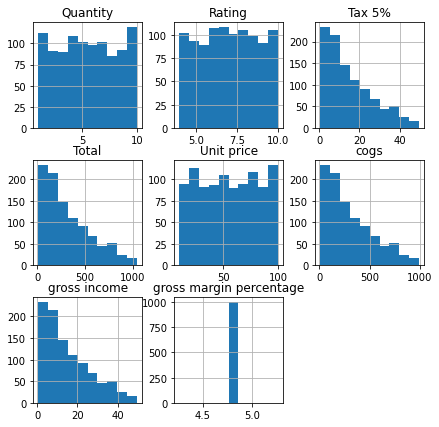

In [34]:
sales.hist(figsize = (7, 7))

In [37]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

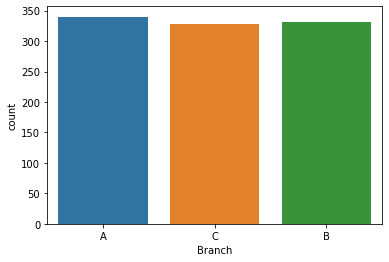

In [38]:
sns.countplot(x = df["Branch"])

Text(0.5, 1.0, 'Ratings by Branch')

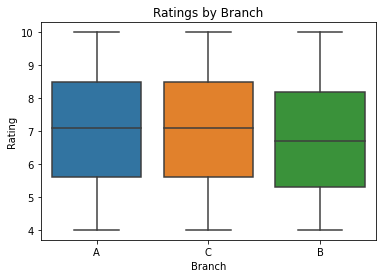

In [40]:
sns.boxplot(x = "Branch", y = "Rating", data = sales).set_title("Ratings by Branch") 

Branch B has the lowest rating. 

In [41]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

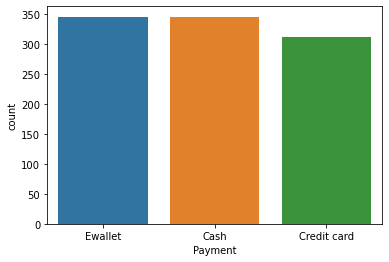

In [42]:
sns.countplot(x = df["Payment"])


Ewallet is the most prefered way of paying, followed by cash, and then credit card.

Text(0.5, 1.0, 'Payment Channel by Branch')

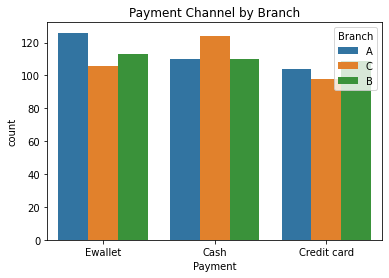

In [64]:
sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

Ewallet is the most preffered way of payment for branch A. In branch C Cash payment is used the most. For brench B Ewalllet is again the most preffered way of paying. 

In [43]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

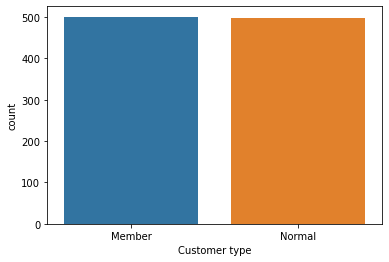

In [44]:
sns.countplot(x = df["Customer type"])

There is a slightly higher number of members versus normal customers. 

Text(0.5, 1.0, 'Customer Type by Branch')

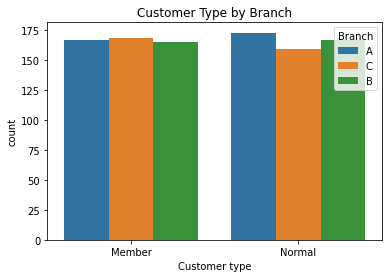

In [65]:
sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

Customers that are members are the most represented in branch C. The highest number of normal customers is in branch A.

Text(0.5, 1.0, 'Payment by Customer type')

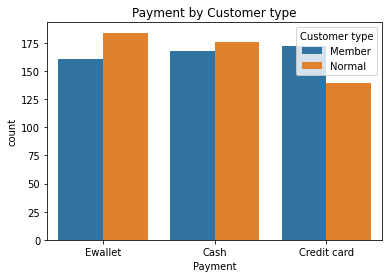

In [69]:
 sns.countplot(x="Payment",  hue = "Customer type", data =sales).set_title("Payment by Customer type") 

Members prefer to pay with credit card and normal customers with Ewallet option. Normal customers pay with credit card significantly less complared to other two options. 

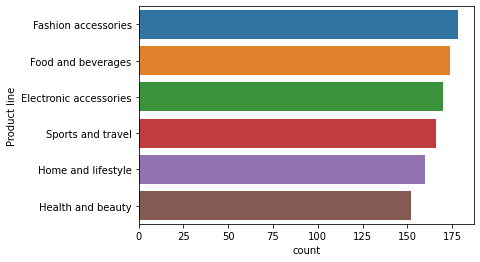

In [63]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )


Fashion accessories sell the best. Health and beauty the least. 

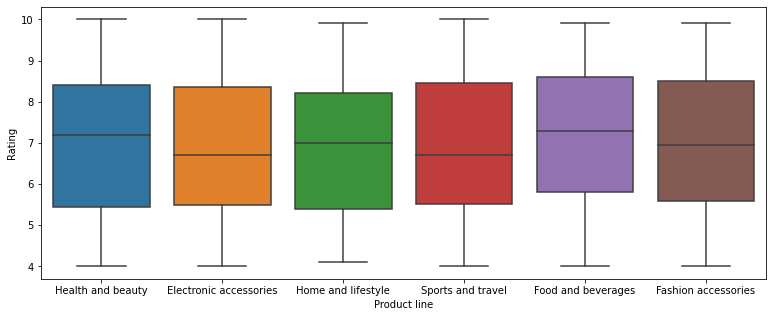

In [77]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.boxplot(x = df["Product line"], y = df["Rating"])

Food and beverages have the best rating. Electronic accessories and Sport and travel the worse.

In [46]:
round(sales.corr(), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


Correlation analysis

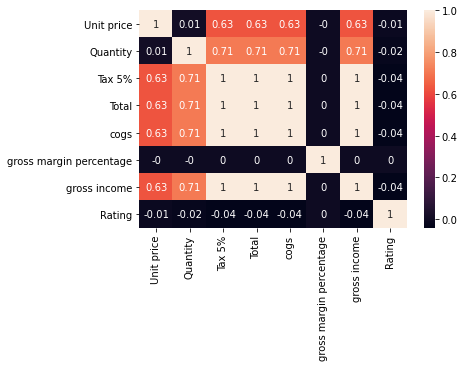

In [51]:
sns.heatmap(round(sales.corr(), 2), annot = True)

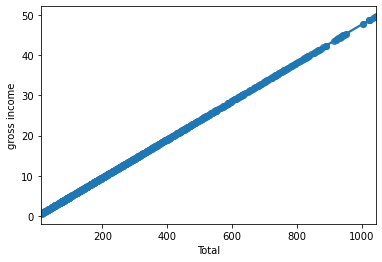

In [118]:
sns.regplot(x = sales["Total"], y = sales["gross income"])